# 0. GPU Setting

In [1]:
import torch
from torch import nn
import torch.nn.functional as F

/Users/s2hee/opt/anaconda3/envs/sehee/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(5,5)
 
    def forward(self,x):
        net = self.lin1(x)
        return net

In [3]:
device = torch.device("mps") if torch.backends.mps.is_available() else "cpu"
print(f"device: {device}")

device: mps


In [4]:
# MPS 장치에 바로 tensor를 생성합니다.
x = torch.ones(5, device=device)
 
# GPU 상에서 연산 진행
y = x * 2
 
# 또는, 다른 장치와 마찬가지로 MPS로 이동할 수도 있습니다.
model = Net()# 어떤 모델의 객체를 생성한 뒤,
model.to(device) # MPS 장치로 이동합니다.
 
# 이제 모델과 텐서를 호출하면 GPU에서 연산이 이뤄집니다.
pred = model(x)
print(pred)

tensor([ 0.7489, -0.7436,  0.6373, -0.5621, -0.1569], device='mps:0',
       grad_fn=<LinearBackward0>)


/Users/s2hee/opt/anaconda3/envs/sehee/lib/python3.9/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1667808783679/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


In [5]:
print (f"PyTorch version:{torch.__version__}") # 1.12.1 이상
print(f"MPS 장치를 지원하도록 build 되었는지: {torch.backends.mps.is_built()}") # True 여야 합니다.
print(f"MPS 장치가 사용 가능한지: {torch.backends.mps.is_available()}") # True 여야 합니다.
!python -c 'import platform;print(platform.platform())'

PyTorch version:1.14.0.dev20221107
MPS 장치를 지원하도록 build 되었는지: True
MPS 장치가 사용 가능한지: True
macOS-10.16-x86_64-i386-64bit


# 1. Data Exploration

In [6]:
# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "/Users/s2hee/Desktop/deep_learning/public_training_set_release_2.1/training_annotations.json"
TRAIN_IMAGE_DIRECTIORY = "/Users/s2hee/Desktop/deep_learning/public_training_set_release_2.1/images/"

VAL_ANNOTATIONS_PATH = "/Users/s2hee/Desktop/deep_learning/public_validation_set_release_2.1/vdset_annotations.json"
VAL_IMAGE_DIRECTIORY = "/Users/s2hee/Desktop/deep_learning/public_validation_set_release_2.1/images/"

In [7]:
# For reading annotations file
import pycocotools
from pycocotools.coco import COCO
train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

loading annotations into memory...
Done (t=2.68s)
creating index...
index created!


In [8]:
# Reading the annotation files
import json
with open(TRAIN_ANNOTATIONS_PATH) as f:
  train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
  val_annotations_data = json.load(f)

In [9]:
train_annotations_data['annotations'][0]

{'id': 184123,
 'image_id': 131072,
 'category_id': 101246,
 'segmentation': [[169.0,
   379.5,
   130.0,
   374.5,
   112.0,
   363.5,
   94.5,
   340.0,
   61.5,
   213.0,
   61.5,
   188.0,
   70.5,
   168.0,
   87.0,
   152.5,
   103.0,
   143.5,
   123.0,
   139.5,
   185.0,
   118.5,
   226.0,
   90.5,
   249.0,
   87.5,
   309.0,
   88.5,
   339.0,
   110.5,
   350.5,
   125.00000000000001,
   354.5,
   155.0,
   382.5,
   231.0,
   383.5,
   277.0,
   360.0,
   303.5,
   327.0,
   331.5,
   308.0,
   343.5,
   216.0,
   373.5]],
 'area': 71393.0,
 'bbox': [61.5, 61.5, 318.0, 322.0],
 'iscrowd': 0}

In [10]:
val_annotations_data['annotations'][0]

{'id': 233459,
 'image_id': 149022,
 'category_id': 101182,
 'segmentation': [[214.0,
   152.5,
   175.0,
   144.5,
   156.5,
   133.0,
   153.5,
   119.0,
   159.5,
   99.0,
   168.0,
   89.5,
   191.0,
   77.5,
   231.99999999999997,
   73.5,
   258.0,
   80.5,
   279.5,
   95.0,
   285.5,
   104.0,
   288.5,
   122.0,
   278.0,
   137.5,
   250.00000000000003,
   148.5]],
 'area': 8225.0,
 'bbox': [77.5, 153.5, 136.5, 135.0],
 'iscrowd': 0}

In [10]:
# Reading all classes
category_ids = train_coco.loadCats(train_coco.getCatIds())
category_names = [_["name_readable"] for _ in category_ids]

print("## Categories\n-", "\n- ".join(category_names))

## Categories
- Beetroot, steamed, without addition of salt
- bread_wholemeal
- jam
- water
- bread
- banana
- soft_cheese
- ham_raw
- hard_cheese
- cottage_cheese
- coffee
- fruit_mixed
- pancake
- tea
- salmon_smoked
- avocado
- spring_onion_scallion
- ristretto_with_caffeine
- ham_n_s
- egg
- bacon
- chips_french_fries
- juice_apple
- chicken
- tomato
- broccoli
- shrimp_prawn
- carrot
- chickpeas
- french_salad_dressing
- pasta_hornli_ch
- sauce_cream
- pasta_n_s
- tomato_sauce
- cheese_n_s
- pear
- cashew_nut
- almonds
- lentil_n_s
- mixed_vegetables
- peanut_butter
- apple
- blueberries
- cucumber
- yogurt
- butter
- mayonnaise
- soup
- wine_red
- wine_white
- green_bean_steamed_without_addition_of_salt
- sausage
- pizza_margherita_baked
- salami_ch
- mushroom
- tart_n_s
- rice
- white_coffee
- sunflower_seeds
- bell_pepper_red_raw
- zucchini
- asparagus
- tartar_sauce
- lye_pretzel_soft
- cucumber_pickled_ch
- curry_vegetarian
- soup_of_lentils_dahl_dhal
- salmon
- salt_cake_ch_

In [11]:
import pandas as pd
img_info = pd.DataFrame(train_coco.loadImgs(train_coco.getImgIds()))
print(img_info)

           id   file_name  width  height
0      131072  131072.jpg    464     464
1      131087  131087.jpg    464     464
2      131088  131088.jpg    511     512
3      131094  131094.jpg    480     480
4      131096  131096.jpg    464     464
...       ...         ...    ...     ...
54387  131024  131024.jpg    512     910
54388  131033  131033.jpg    455     455
54389  131053  131053.jpg    391     390
54390  131066  131066.jpg    464     464
54391  131071  131071.jpg    464     464

[54392 rows x 4 columns]


KeyboardInterrupt: 

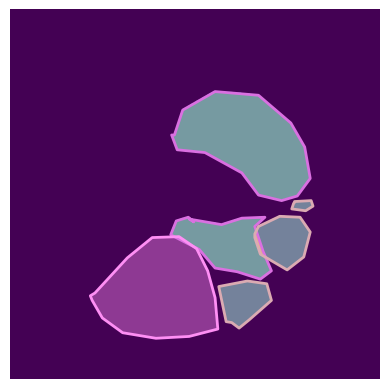

In [12]:
import matplotlib.pyplot as plt

start_no = 1
end_no = len(train_annotations_data['images'])
# 모든 train 데이터의 이미지애 대하여..
for img_no in range(start_no, end_no):
    
    annIds = train_coco.getAnnIds(imgIds=train_annotations_data['images'][img_no]['id'])
    anns = train_coco.loadAnns(annIds)

    # load and render the image
    plt.imshow(plt.imread(TRAIN_IMAGE_DIRECTIORY+train_annotations_data['images'][img_no]['file_name']))
    plt.axis('off')
    # Render annotations on top of the image
    train_coco.showAnns(anns)

    mask = train_coco.annToMask(anns[0])
    for i in range(len(anns)):
        mask += train_coco.annToMask(anns[i])
        plt.imshow(mask)
        plt.axis("off")
        plt.savefig(fname='masks/' + str(train_annotations_data['images'][img_no]['id']) + '.png', bbox_inches='tight', pad_inches=0)
    
    # plot 초기화
    plt.clf()
        

In [13]:
# change file name
import os
path = "/Users/s2hee/Desktop/deep_learning/masks"
file_list = os.listdir(path)

In [33]:
for name in file_list:
    newname = name.replace(".png", "")
    newname = newname.zfill(6)
    newname = newname + ".png"
    src = os.path.join(path, name)
    dst = os.path.join(path, newname)
    os.rename(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/s2hee/Desktop/deep_learning/public_training_set_release_2.1111214.jpg/038142.png' -> '/Users/s2hee/Desktop/deep_learning/public_training_set_release_2.1111214.jpg/038142.png'

# 2. Basic U-Net Model segmentation

In [14]:
import torch
import torch.nn as nn

class UNet(nn.Module):
    def cont_block(self, in_channels, out_channels, kernel_size=3):
        block = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, 
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.Dropout2d(), # p=0.5
                              nn.Conv2d(in_channels=out_channels, out_channels=out_channels, 
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.BatchNorm2d(out_channels))
        return block
    
    def expn_block(self, in_channels, mid_channel, out_channels, kernel_size=3):
        block = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=mid_channel,
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.Dropout2d(),
                              nn.Conv2d(in_channels=mid_channel, out_channels=mid_channel,
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.BatchNorm2d(mid_channel),
                              nn.ConvTranspose2d(in_channels=mid_channel, out_channels=out_channels,
                                                 kernel_size=kernel_size, stride=2, padding=1, output_padding=1))
        return block
    
    def final_block(self, in_channels, mid_channel, out_channels, kernel_size=3):
        block = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=mid_channel,
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.Dropout2d(),
                              nn.Conv2d(in_channels=mid_channel, out_channels=mid_channel,
                                        kernel_size=kernel_size, padding=1),
                              nn.ReLU(),
                              nn.BatchNorm2d(mid_channel),
                              nn.Conv2d(in_channels=mid_channel, out_channels=out_channels,
                                        kernel_size=kernel_size, padding=1),
                              nn.Sigmoid()
                              )
        return block
    
    def __init__(self, in_channel, out_channel):
        super(UNet, self).__init__()
        self.contl_1 = self.cont_block(in_channels=in_channel, out_channels=64)
        self.contl_1_mp = nn.MaxPool2d(kernel_size=2)
        self.contl_2 = self.cont_block(in_channels=64, out_channels=128)
        self.contl_2_mp = nn.MaxPool2d(kernel_size=2)
        self.contl_3 = self.cont_block(in_channels=128, out_channels=256)
        self.contl_3_mp = nn.MaxPool2d(kernel_size=2)
        self.contl_4 = self.cont_block(in_channels=256, out_channels=512)
        self.contl_4_mp = nn.MaxPool2d(kernel_size=2)
        
        self.bottleneck = nn.Sequential(nn.Conv2d(in_channels=512, out_channels=1024, 
                                                  kernel_size=3, padding=1),
                                        nn.ReLU(),
                                        nn.BatchNorm2d(1024),
                                        nn.Conv2d(in_channels=1024, out_channels=1024, 
                                                  kernel_size=3, padding=1),
                                        nn.ReLU(),
                                        nn.BatchNorm2d(1024),
                                        nn.ConvTranspose2d(in_channels=1024, out_channels=512,
                                                           kernel_size=3, stride=2, padding=1, output_padding=1)
                                        )
        
        self.expnl_1 = self.expn_block(1024, 512, 256)
        self.expnl_2 = self.expn_block(512, 256, 128)
        self.expnl_3 = self.expn_block(256, 128, 64)
        self.final_layer = self.final_block(128, 64, out_channel)
    
    def crop_and_concat(self, upsampled, bypass, crop=False):
        if crop:
            c = (bypass.size()[2] - upsampled.size()[2]) // 2
            bypass = F.pad(bypass, (-c, -c, -c, -c))
        return torch.cat((upsampled, bypass), 1)
    
    def forward(self, x):
        contl_1_out = self.contl_1(x) 
        contl_1_pool = self.contl_1_mp(contl_1_out)
        contl_2_out = self.contl_2(contl_1_pool)
        contl_2_pool = self.contl_2_mp(contl_2_out)
        contl_3_out = self.contl_3(contl_2_pool)
        contl_3_pool = self.contl_3_mp(contl_3_out)
        contl_4_out = self.contl_4(contl_3_pool)
        contl_4_pool = self.contl_4_mp(contl_4_out)
        
        bottleneck_out = self.bottleneck(contl_4_pool)
        
        """ Skip connection of the expansive sub-module """
        expnl_1_cat = self.crop_and_concat(bottleneck_out, contl_4_out)
        expnl_1_out = self.expnl_1(expnl_1_cat)
        expnl_2_cat = self.crop_and_concat(expnl_1_out, contl_3_out)
        expnl_2_out = self.expnl_2(expnl_2_cat)
        expnl_3_cat = self.crop_and_concat(expnl_2_out, contl_2_out)
        expnl_3_out = self.expnl_3(expnl_3_cat)
        final_cat = self.crop_and_concat(expnl_3_out, contl_1_out)
        final_out = self.final_layer(final_cat)
        
        return final_out

In [15]:
# iou definition
def iou(pred, target, n_classes = 2):
    
    iou = []
    pred = pred.view(-1)
    target = target.view(-1)

    # Ignore IoU for background class ("0")
    for cls in range(1, n_classes):
        pred_inds = pred == cls
        target_inds = target == cls
        intersection = (pred_inds[target_inds]).long().sum().data.cpu().item()
        union = pred_inds.long().sum().data.cpu().item() + target_inds.long().sum().data.cpu().item() - intersection

        if union == 0:
            iou.append(float('nan'))  # If there is no ground truth, do not include in evaluation
        else:
            iou.append(float(intersection) / float(max(union, 1)))

    return sum(iou)

In [16]:
import numpy as np
def iou_metric(y_pred, y_true, n_classes = 2):
    miou = []
    for i in np.arange(0.5, 1.0, 0.05):
        y_pred_ = (y_pred > i)
        iou_init = iou(y_pred_, y_true, n_classes = n_classes)
        miou.append(iou_init)
    
    return sum(miou)/len(miou)

In [17]:
import os
import random
from sklearn.model_selection import train_test_split
import torchvision.transforms.functional as TF

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2

In [18]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(42)

In [19]:
device = torch.device("mps") if torch.backends.mps.is_available() else "cpu"
print(f"device: {device}")

device: mps


In [20]:
!ls

basic_U_Net_.ipynb                public_validation_set_release_2.1
dacon_example.ipynb               stage1_train
detectron2                        x_train.npy
masks                             y_train.npy
public_training_set_release_2.1


In [21]:
# Set directory

TRAIN_PATH = "/Users/s2hee/Desktop/deep_learning/public_training_set_release_2.1"
VAL_PATH = "/Users/s2hee/Desktop/deep_learning/public_validation_set_release_2.1"

train_dir = os.listdir(TRAIN_PATH)
val_dir = os.listdir(VAL_PATH)

In [22]:
train_dir

['.DS_Store', 'images', 'training_annotations.json']

In [23]:
train_dir_path = "/Users/s2hee/Desktop/deep_learning/public_training_set_release_2.1/images"
train_ids = os.listdir(train_dir_path)
val_dir_path = "/Users/s2hee/Desktop/deep_learning/public_validation_set_release_2.1/images"
val_ids = os.listdir(val_dir_path)

In [24]:
# hyperparameter

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
width_out = 128
height_out = 128

In [25]:
x_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y_train = np.zeros((len(train_ids), height_out, width_out, 1), dtype=bool)
x_val = np.zeros((len(val_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

In [27]:
for i, id_ in enumerate(train_ids):
    path = TRAIN_PATH + id_
    img = cv2.imread(TRAIN_PATH+'/images/'+id_)
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    x_train[i] = img

    mask_path = "/Users/s2hee/Desktop/deep_learning/masks/"
    mask_ = cv2.imread(mask_path+id_[:6]+".png", 0)
    mask_ = cv2.resize(mask_, (height_out, width_out))
    mask_ = np.expand_dims(mask_, axis=-1)

    y_train[i] = mask_

KeyboardInterrupt: 

In [186]:
np.save("x_train.npy", x_train)

In [187]:
np.save("y_train.npy", y_train)

In [28]:
# Data augmentation 없이 학습하기

class UNetDataset(Dataset):
    def __init__(self, images_np, masks_np):
        self.images_np = images_np
        self.masks_np = masks_np
    
    def transform(self, image_np, mask_np):
        ToPILImage = transforms.ToPILImage()
        image = ToPILImage(image_np)
        mask = ToPILImage(mask_np.astype(np.int32))
        
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)
        return image, mask

    def __len__(self):
        return len(self.images_np)
    
    def __getitem__(self, idx):
        image_np = self.images_np[idx]
        mask_np = self.masks_np[idx]
        image, mask = self.transform(image_np, mask_np)
        
        return image, mask

In [29]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)
train_dataset = UNetDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_dataset = UNetDataset(x_val, y_val)
valid_loader = DataLoader(valid_dataset, batch_size=8, shuffle=False)

In [30]:
model = UNet(in_channel=3, out_channel=1).to(device)

In [31]:
print(model)

UNet(
  (contl_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Dropout2d(p=0.5, inplace=False)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (contl_1_mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (contl_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Dropout2d(p=0.5, inplace=False)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (contl_2_mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (contl_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): 

In [32]:
epochs = 25
alpha = 5
batch_size = 16
# nn.CrossEntropyLoss() (paper) -> BCELoss()
criterion=nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
train_iou_sum = 0
valid_iou_sum = 0

In [193]:
train_loss_list = []
val_loss_list = []
train_iou_list = []
val_iou_list = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_iou = 0

    for image, mask in train_loader:
        image = image.to(device)
        mask = mask.to(device)
        optimizer.zero_grad()
        outputs = model(image.float())
    
        loss = criterion(outputs.float(), mask.float())
        train_loss += loss

        train_iou += iou_metric(outputs, mask)
        rev_iou = 16 - iou_metric(outputs, mask)
        loss += alpha * rev_iou

        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        valid_loss = 0
        valid_iou = 0

        for image_val, mask_val in valid_loader:
            image_val = image_val.to(device)
            mask_val = mask_val.to(device)
            output_val = model(image_val.float())
            valid_loss += criterion(output_val.float(), mask_val.float())
            valid_iou += iou_metric(output_val, mask_val)

    print("Epoch ", epoch + 1, " Training Loss: ", train_loss/len(train_loader), "Validation Loss: ", valid_loss/len(valid_loader))
    print("Training IoU: ", train_iou/len(train_loader), "Validation IoU: ", valid_iou/len(valid_loader))
    train_iou_sum += train_iou/len(train_loader)
    valid_iou_sum += valid_iou/len(valid_loader)

    # visualization
    train_loss_list.append(train_loss/len(train_loader))
    val_loss_list.append(valid_loss/len(valid_loader))
    train_iou_list.append(train_iou/len(train_loader))
    val_iou_list.append(valid_iou/len(valid_loader)
)
    
print("Training Mean IoU: {:.2f}".format(train_iou_sum/epochs), " Validation Mean IoU: {:.2f}".format(valid_iou_sum/epochs))

Epoch  1  Training Loss:  tensor(0.0155, device='mps:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(3.1915e-05, device='mps:0')
Training IoU:  0.9799779721428373 Validation IoU:  1.0
Epoch  2  Training Loss:  tensor(1.2031e-05, device='mps:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(4.8718e-06, device='mps:0')
Training IoU:  0.9999999953625248 Validation IoU:  1.0
Epoch  3  Training Loss:  tensor(2.2070e-06, device='mps:0', grad_fn=<DivBackward0>) Validation Loss:  tensor(1.0599e-06, device='mps:0')
Training IoU:  0.9999999958113128 Validation IoU:  1.0


In [ ]:
# Loss, IOU 값 시각화하기

train_loss_data = [i.detach().cpu().numpy() for i in train_loss_list]
val_loss_data = [i.detach().cpu().numpy() for i in val_loss_list]
# train_iou_data = [i.detach().cpu().numpy() for i in train_iou_list]
# val_iou_data = [i.detach().cpu().numpy() for i in val_iou_list]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6)) 
plt.subplot(1,2,1)
plt.title('loss')
plt.xlabel('epoch')
plt.plot(train_loss_data, 'b', label='train loss')
plt.plot(val_loss_data, 'g', label='val loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title('iou')
plt.xlabel('epoch')
plt.plot(train_iou_list, 'b', label='train iou')
plt.plot(val_iou_list, 'g', label='val iou')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# 실제값, 예측값 시각화하기

for img_, mask_ in valid_loader:
    img = img_[1].to(device)
    img.unsqueeze_(0)
    mask_pred = model(img.float())
    mask_pred = mask_pred.cpu()
    mask_pred = (mask_pred > 0.75)
    mask_true = mask_[1]

    img = TF.to_pil_image(mask_pred.float().squeeze(0))
    mask = TF.to_pil_image(mask_true)

    img = np.array(img)
    mask = np.array(mask)

    fig, (axis_1, axis_2) = plt.subplots(1, 2, figsize=(15, 6))
    axis_1.imshow(img.astype(np.uint8), cmap='gray')
    axis_1.set_title('Input Image')
    axis_2.imshow(mask.astype(np.uint8), cmap='gray')
    axis_2.set_title('Prediction')
    plt.show()

    break

In [ ]:
# Data augmentation 적용하여 학습하기

class UNetDataset_DAug(Dataset):
    def __init__(self, images_np, masks_np):
        self.images_np = images_np
        self.masks_np = masks_np
    
    def transform(self, image_np, mask_np):
        ToPILImage = transforms.ToPILImage()
        image = ToPILImage(image_np)
        mask = ToPILImage(mask_np.astype(np.int32))
        
        image = TF.pad(image, padding = 20, padding_mode = 'reflect')
        mask = TF.pad(mask, padding = 20, padding_mode = 'reflect')
              
        angle = random.uniform(-10, 10)
        width, height = image.size
        max_dx = 0.1 * width
        max_dy = 0.1 * height
        translations = (np.round(random.uniform(-max_dx, max_dx)), np.round(random.uniform(-max_dy, max_dy)))
        scale = random.uniform(0.8, 1.2)
        shear = random.uniform(-0.5, 0.5)
        image = TF.affine(image, angle = angle, translate = translations, scale = scale, shear = shear)
        mask = TF.affine(mask, angle = angle, translate = translations, scale = scale, shear = shear)
        

        image = TF.center_crop(image, (128, 128))
        mask = TF.center_crop(mask, (128, 128))
        
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)
        return image, mask

    def __len__(self):
        return len(self.images_np)
    
    def __getitem__(self, idx):
        image_np = self.images_np[idx]
        mask_np = self.masks_np[idx]
        image, mask = self.transform(image_np, mask_np)
        
        return image, mask

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)
train_dataset = UNetDataset_DAug(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_dataset = UNetDataset_DAug(x_val, y_val)
valid_loader = DataLoader(valid_dataset, batch_size=8, shuffle=False)

In [ ]:
model2 = UNet(in_channel=3, out_channel=1).to(device)

In [ ]:
epochs = 25 
alpha = 5
batch_size = 16 
# nn.CrossEntropyLoss() (paper) -> BCELoss()
criterion=nn.BCELoss()
optimizer = optim.Adam(model2.parameters(), lr=1e-3)
train_iou_sum = 0
valid_iou_sum = 0

In [ ]:
train_loss_list = []
val_loss_list = []
train_iou_list = []
val_iou_list = []

for epoch in range(epochs):
    model2.train()
    train_loss = 0
    train_iou = 0

    for image, mask in train_loader:
        image = image.to(device)
        mask = mask.to(device)
        optimizer.zero_grad()
        outputs = model2(image.float())
    
        loss = criterion(outputs.float(), mask.float())
        train_loss += loss

        train_iou += iou_metric(outputs, mask)
        rev_iou = 16 - iou_metric(outputs, mask)
        loss += alpha * rev_iou

        loss.backward()
        optimizer.step()

    model2.eval()
    with torch.no_grad():
        valid_loss = 0
        valid_iou = 0

        for image_val, mask_val in valid_loader:
            image_val = image_val.to(device)
            mask_val = mask_val.to(device)
            output_val = model2(image_val.float())
            valid_loss += criterion(output_val.float(), mask_val.float())
            valid_iou += iou_metric(output_val, mask_val)

    print("Epoch ", epoch + 1, " Training Loss: ", train_loss/len(train_loader), "Validation Loss: ", valid_loss/len(valid_loader))
    print("Training IoU: ", train_iou/len(train_loader), "Validation IoU: ", valid_iou/len(valid_loader))
    train_iou_sum += train_iou/len(train_loader)
    valid_iou_sum += valid_iou/len(valid_loader)

    # visualization
    train_loss_list.append(train_loss/len(train_loader))
    val_loss_list.append(valid_loss/len(valid_loader))
    train_iou_list.append(train_iou/len(train_loader))
    val_iou_list.append(valid_iou/len(valid_loader)
)
    
print("Training Mean IoU: {:.2f}".format(train_iou_sum/epochs), " Validation Mean IoU: {:.2f}".format(valid_iou_sum/epochs))

In [ ]:
# Loss, IOU 값 시각화

train_loss_data = [i.detach().cpu().numpy() for i in train_loss_list]
val_loss_data = [i.detach().cpu().numpy() for i in val_loss_list]
# train_iou_data = [i.detach().cpu().numpy() for i in train_iou_list]
# val_iou_data = [i.detach().cpu().numpy() for i in val_iou_list]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6)) 
plt.subplot(1,2,1)
plt.title('loss')
plt.xlabel('epoch')
plt.plot(train_loss_data, 'b', label='train loss')
plt.plot(val_loss_data, 'g', label='val loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title('iou')
plt.xlabel('epoch')
plt.plot(train_iou_list, 'b', label='train iou')
plt.plot(val_iou_list, 'g', label='val iou')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# Test 실제값, 예측값 시각화

for img_, mask_ in valid_loader:
    img = img_[1].to(device)
    img.unsqueeze_(0)
    mask_pred = model2(img.float())
    mask_pred = mask_pred.cpu()
    mask_pred = (mask_pred > 0.75)
    mask_true = mask_[1]

    img = TF.to_pil_image(mask_pred.float().squeeze(0))
    mask = TF.to_pil_image(mask_true)

    img = np.array(img)
    mask = np.array(mask)

    fig, (axis_1, axis_2) = plt.subplots(1, 2, figsize=(15, 6))
    axis_1.imshow(img.astype(np.uint8), cmap='gray')
    axis_1.set_title('Input Image')
    axis_2.imshow(mask.astype(np.uint8), cmap='gray')
    axis_2.set_title('Prediction')
    plt.show()

    break